In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno #check this one
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder
import statsmodels.api as sm
from scipy.stats import skew, kurtosis
import scipy.stats as stats 

In [7]:
!pip install missingno


  Obtaining dependency information for missingno from https://files.pythonhosted.org/packages/87/22/cd5cf999af21c2f97486622c551ac3d07361ced8125121e907f588ff5f24/missingno-0.5.2-py3-none-any.whl.metadata


In [13]:
df = pd.read_csv('/Users/nehakumari/Desktop/Data Analyst Couse Files/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


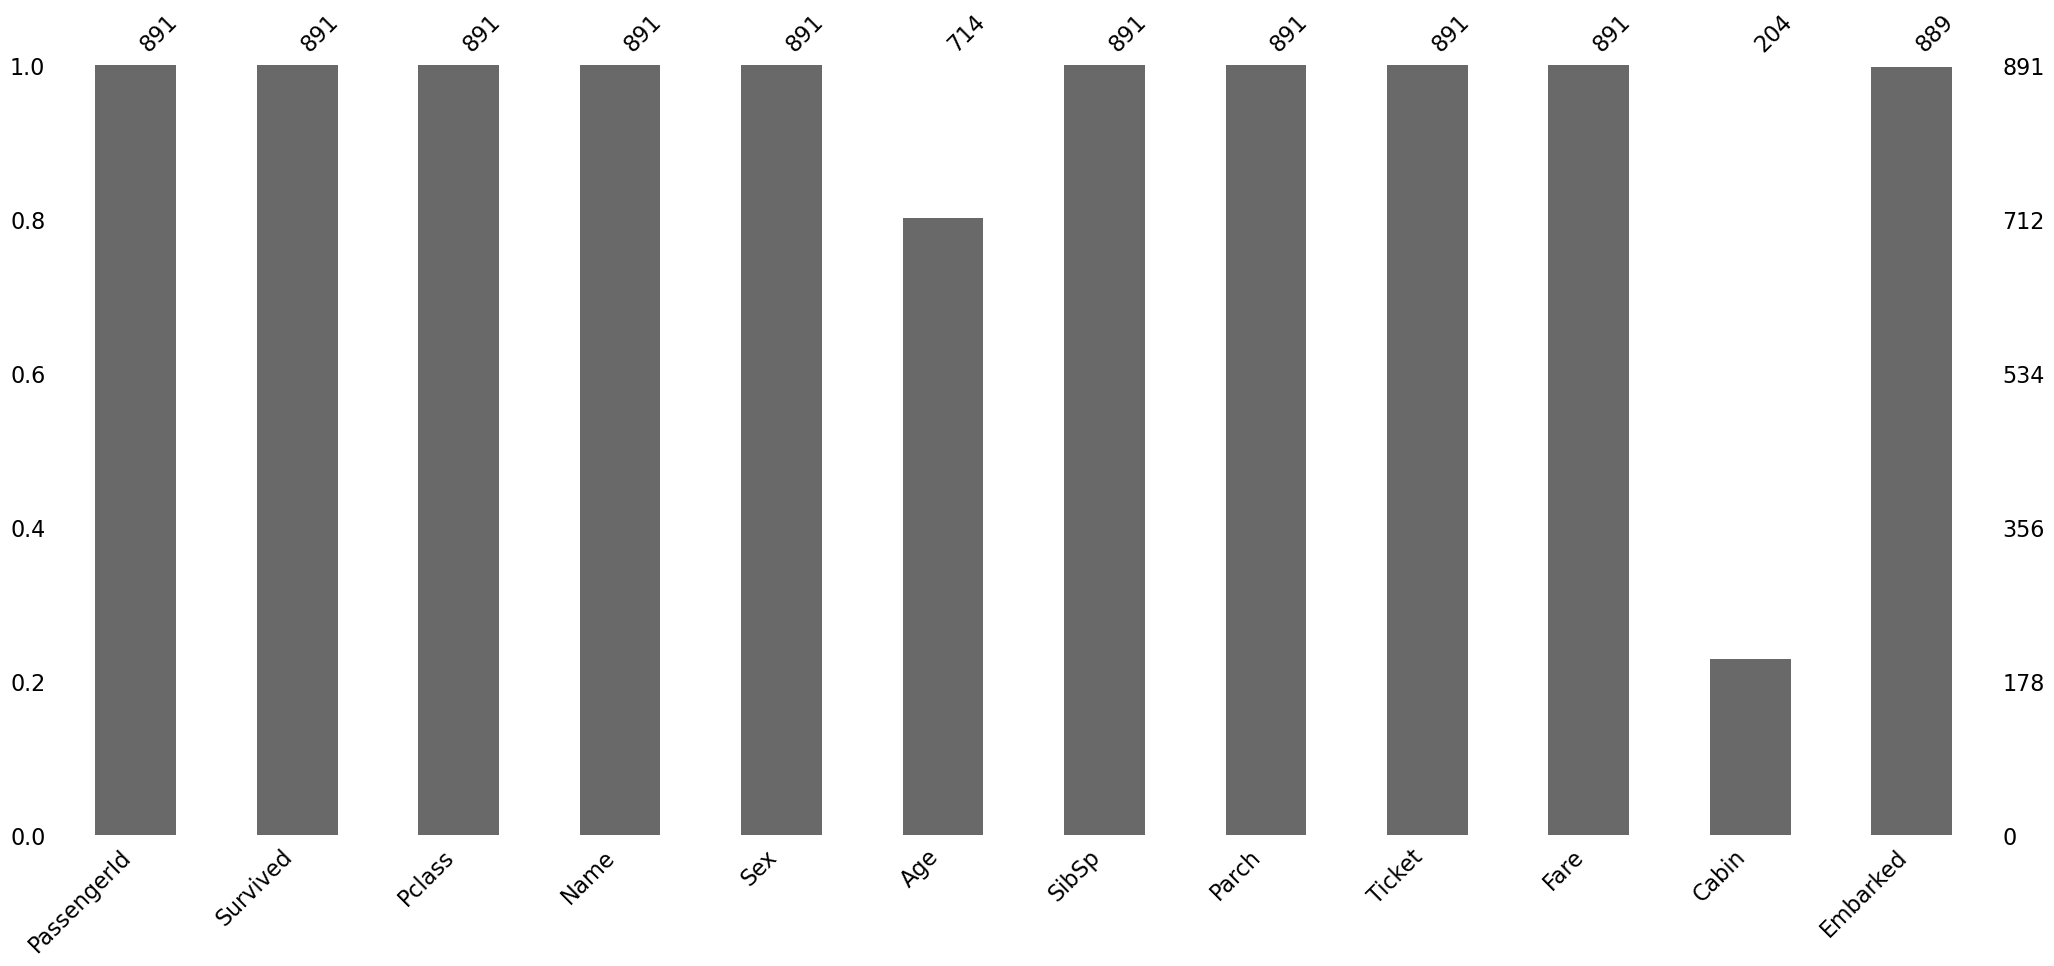

In [19]:
# Visualize missing data as a bar chart
msno.bar(df)
plt.show()

In [28]:
print(df.columns)  # Lists all column names


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


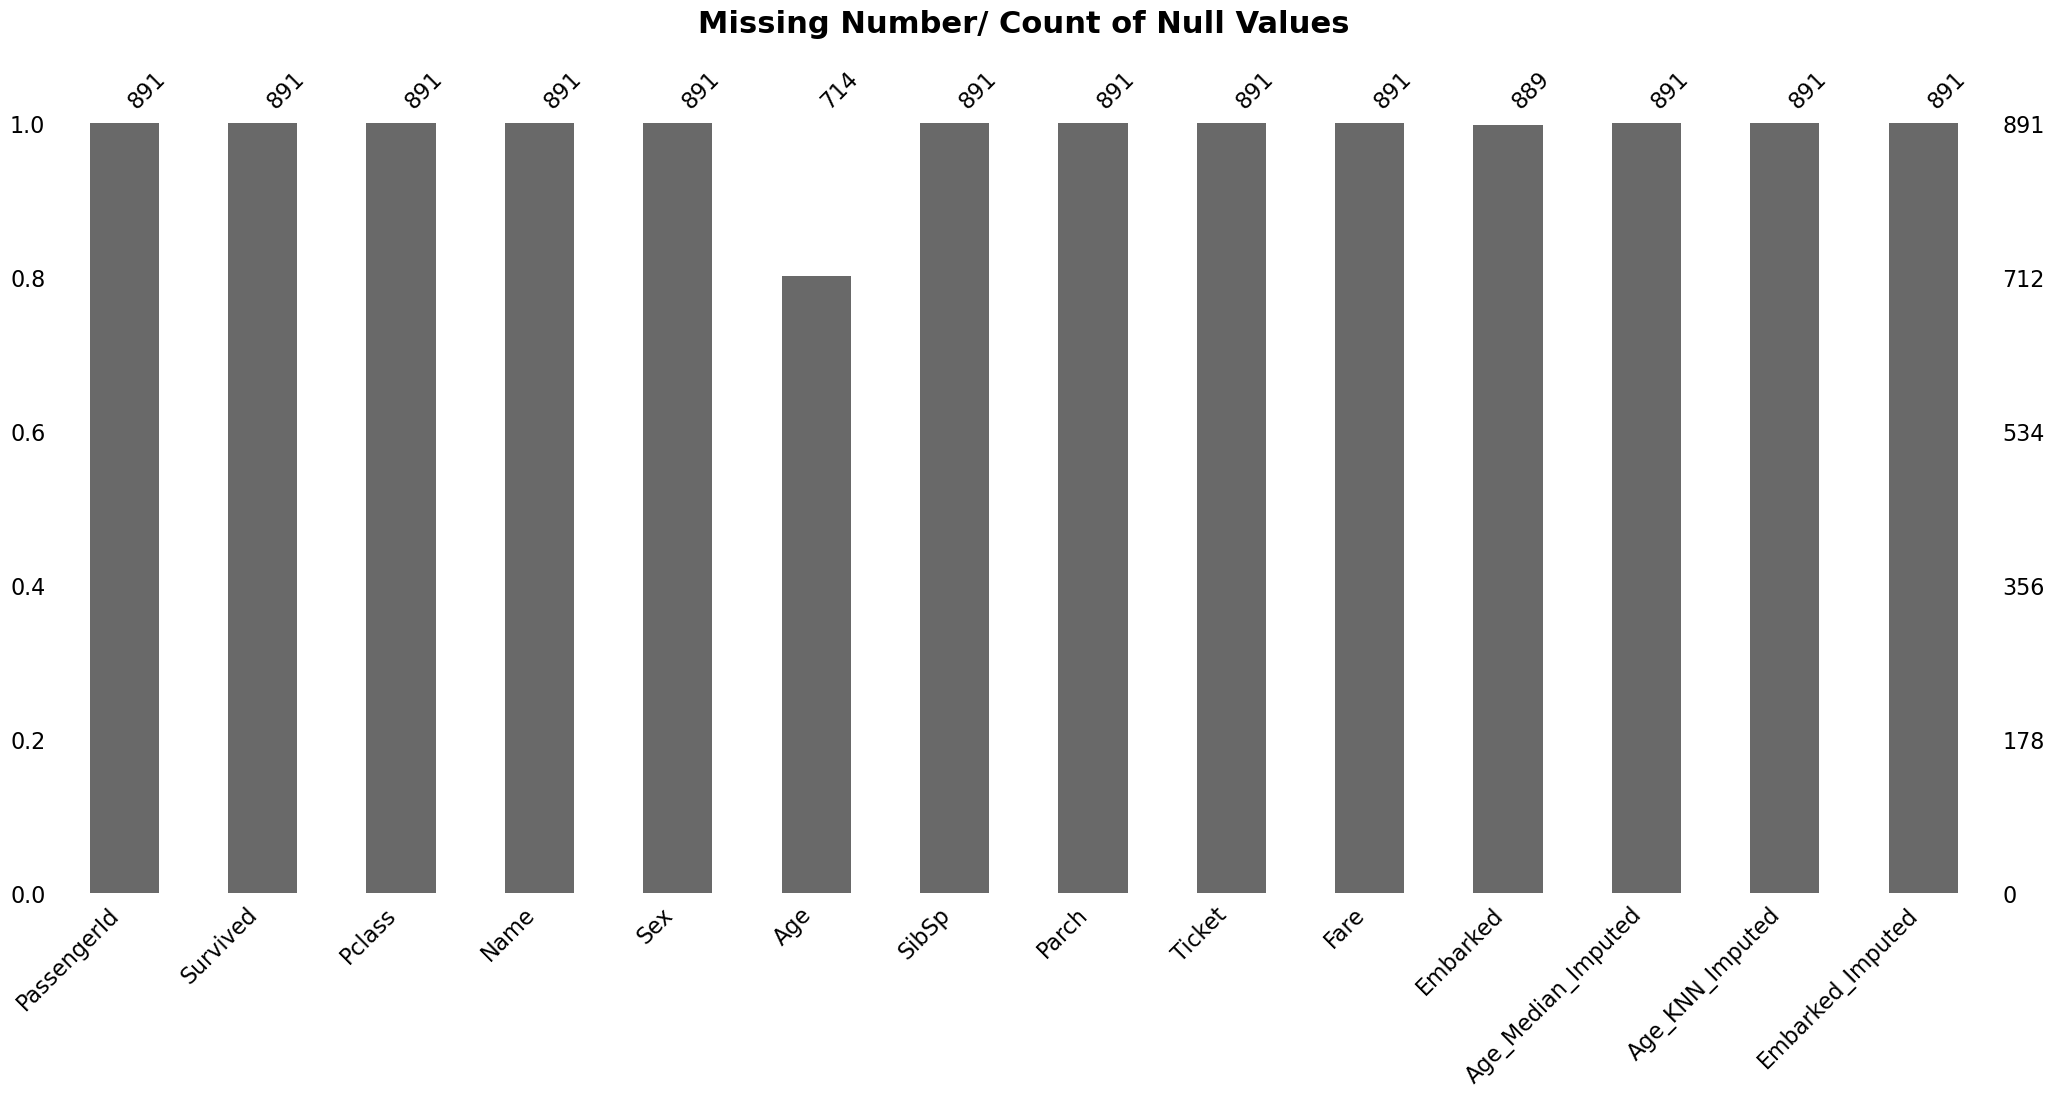

In [156]:
msno.bar(df)
plt.title('Missing Number/ Count of Null Values',fontsize=22,fontweight='bold',pad=25)
plt.show()

In [33]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

# Checking Age distribution of data to impute missing values

 ### Histogram (Visual Check)

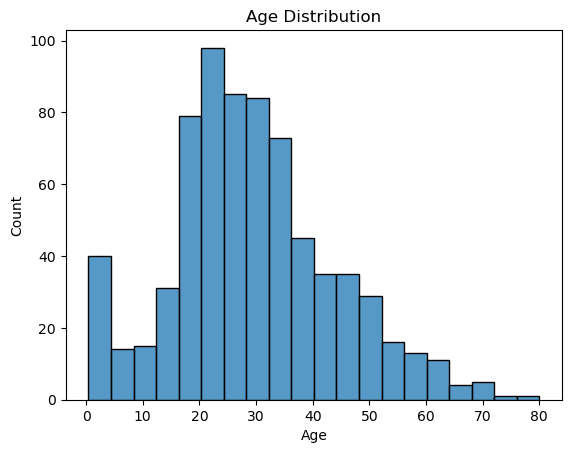

In [76]:
sns.histplot(df['Age'])
plt.title('Age Distribution')
plt.show()

### Box plot - Skewness and outliers

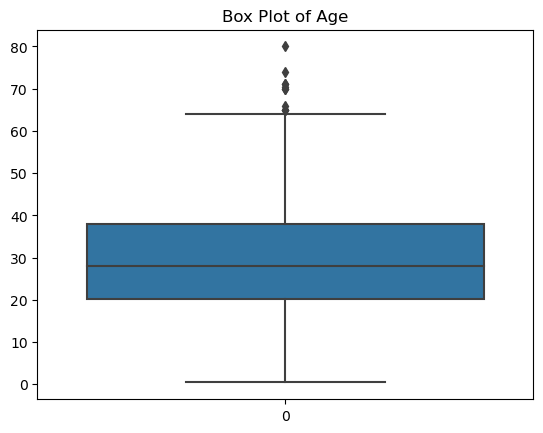

In [77]:
sns.boxplot(df['Age'])
plt.title('Box Plot of Age')
plt.show()

### Skewness & Kurtosis (Statistical Check)

In [86]:
print("Skewness: ",skew(df['Age'].dropna()))
print("Kurtosis:", kurtosis(df['Age'].dropna()))

Skewness:  0.3882898514698657
Kurtosis: 0.16863657224286044


🔥 Skewness = 0.39 (Slightly Right-Skewed)
Skewness close to 0 means the data is almost symmetric.
0.39 is slightly positive, meaning a bit right-skewed (longer tail on the right).
Not extreme, so it's pretty normal-ish but might have a few high values pulling it right.

🔥 Kurtosis = 0.17 (Near Normal)
A normal distribution has Kurtosis ≈ 3 (Mesokurtic).
Your value is close to 0, meaning it's pretty flat (Platykurtic).
Low Kurtosis → Fewer extreme outliers, distribution is spread out evenly.

### QQ Plot

A Quantile-Quantile (QQ) plot is a visual check for normality.

It compares your data against a theoretical normal distribution.
If your data is normally distributed, the points fall on a straight diagonal line.
If there’s a curve or deviation, it means skewness or heavy tails exist.

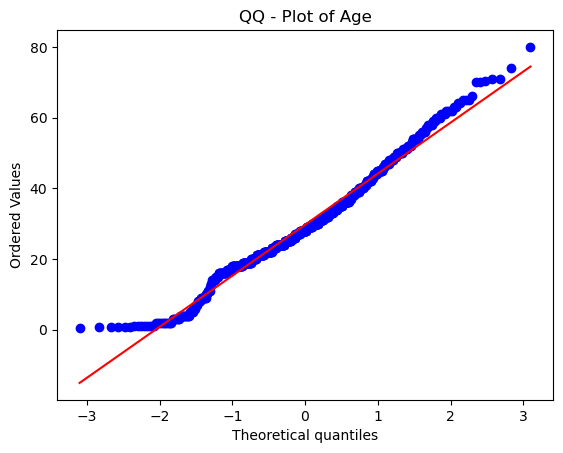

In [91]:
stats.probplot(df['Age'].dropna(), dist='norm', plot=plt)
plt.title('QQ - Plot of Age')
plt.show()

### Impting Age with Median

As the data is slightly right skewed, I am choosing median in place of mean.

In [93]:
df['Age_Median_Imputed'] = df['Age'].fillna(df['Age'].median())

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   Pclass              891 non-null    int64  
 3   Name                891 non-null    object 
 4   Sex                 891 non-null    object 
 5   Age                 714 non-null    float64
 6   SibSp               891 non-null    int64  
 7   Parch               891 non-null    int64  
 8   Ticket              891 non-null    object 
 9   Fare                891 non-null    float64
 10  Embarked            889 non-null    object 
 11  Age_Median_Imputed  891 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB


Median imputation does introduce some level of error because it doesn’t truly “guess” the missing values based on the data's pattern. Instead, it just fills in a static value (the median) for all missing entries.

🔥 What Error Does It Introduce?
1️⃣ Loses Variability 🚫

All missing values get the same median value.
It removes natural fluctuations in data.
2️⃣ Can Distort Distribution 📉

You already know the data is right-skewed.
Filling gaps with the median shrinks the tail slightly, making it less skewed than it originally was.
3️⃣ Messes with Relationships 🔄

If Age is correlated with other features (like Pclass or Fare), median imputation ignores that relationship, which might weaken predictions later in ML models.

### KNN Imptation for Age - Machine Learning

K-Nearest Neighbors (KNN) imputation predicts missing values by looking at the most similar (nearest) data points and taking an average.

In [148]:
#imputing the data
imputer = KNNImputer(n_neighbors=7)
df['Age_KNN_Imputed'] = imputer.fit_transform(df[['Age', 'Fare', 'Pclass', 'Parch']])[:,0]


(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Median_Imputed,Age_KNN_Imputed,Embarked_Imputed
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0,22.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0,38.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0,26.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.0,35.0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.0,35.0,S


# Imputing Embarked Column


In [149]:
df['Embarked_Imputed']= df['Embarked'].fillna(df['Embarked'].mode()[0])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Median_Imputed,Age_KNN_Imputed,Embarked_Imputed
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0,22.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0,38.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0,26.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.0,35.0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.0,35.0,S


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   Pclass              891 non-null    int64  
 3   Name                891 non-null    object 
 4   Sex                 891 non-null    object 
 5   Age                 714 non-null    float64
 6   SibSp               891 non-null    int64  
 7   Parch               891 non-null    int64  
 8   Ticket              891 non-null    object 
 9   Fare                891 non-null    float64
 10  Embarked            889 non-null    object 
 11  Age_Median_Imputed  891 non-null    float64
 12  Age_KNN_Imputed     891 non-null    float64
 13  Embarked_Imputed    891 non-null    object 
dtypes: float64(4), int64(5), object(5)
memory usage: 97.6+ KB


## Comparing between the two imputed Age columns which is Age-median and Age-KNN, to see which is better?

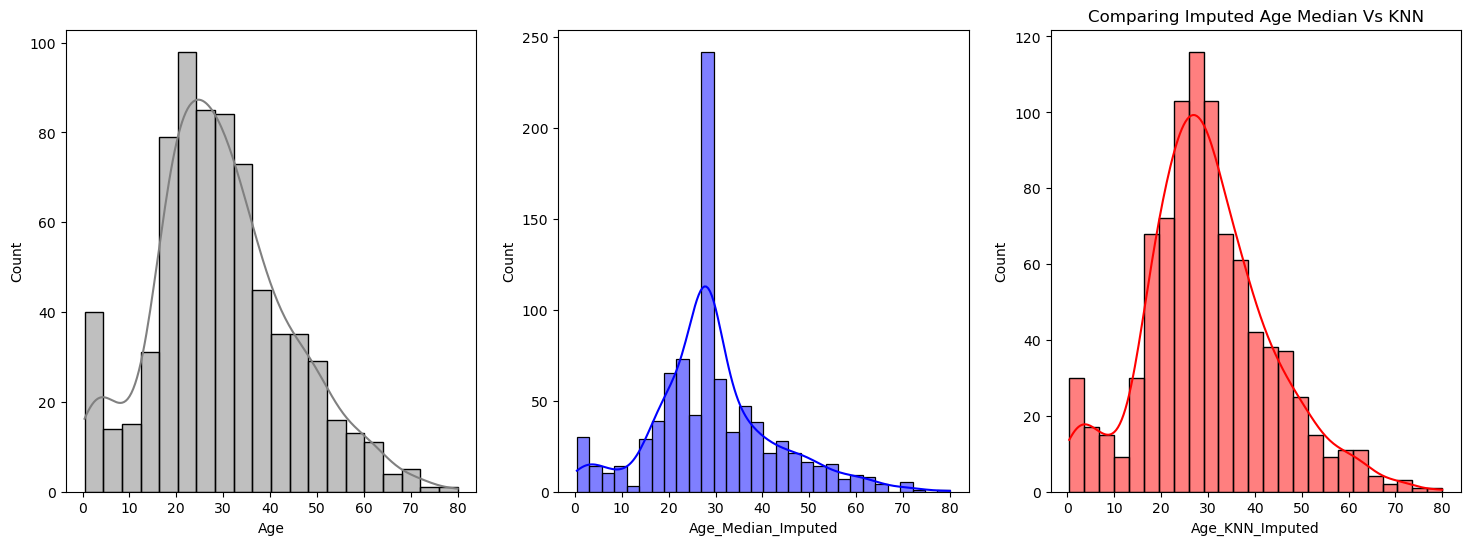

In [151]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(df['Age'],kde=True,color='grey', label='original age',ax=axes[0])
sns.histplot(df['Age_Median_Imputed'],kde=True,color='blue', label='median inputed',ax=axes[1])
sns.histplot(df['Age_KNN_Imputed'],kde=True,color='red',label='KNN inputed',ax=axes[2])
plt.title('Comparing Imputed Age Median Vs KNN')
plt.show()

### Label Encoding: Encoding Sex to Numerical Format

In [192]:
encoder = LabelEncoder()
df['Sex_Encoded'] = encoder.fit_transform(df['Sex'])
df['Sex_Encoded'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex_Encoded, dtype: int64

# Exploratory Data Analysis (EDA)

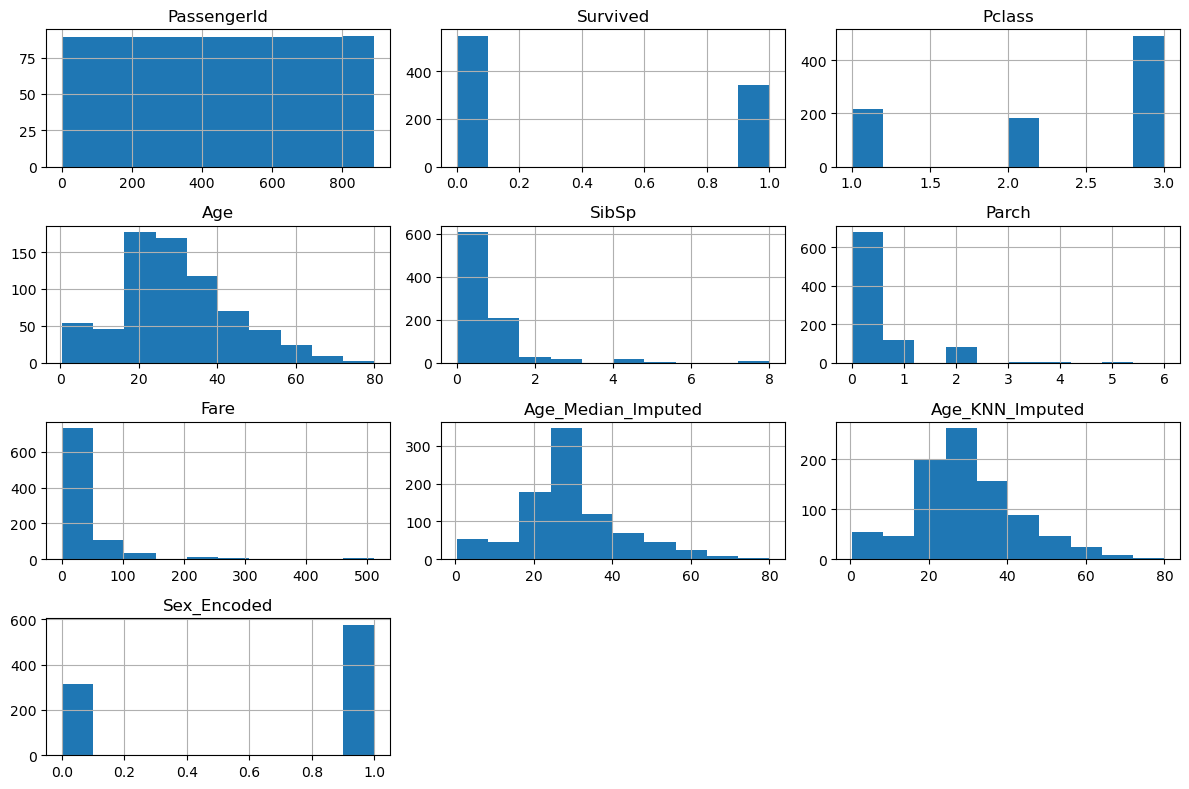

In [193]:
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

/var/folders/lb/gv5g4r_n6wz726t0wv527yhw0000gn/T/ipykernel_47517/2668096106.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


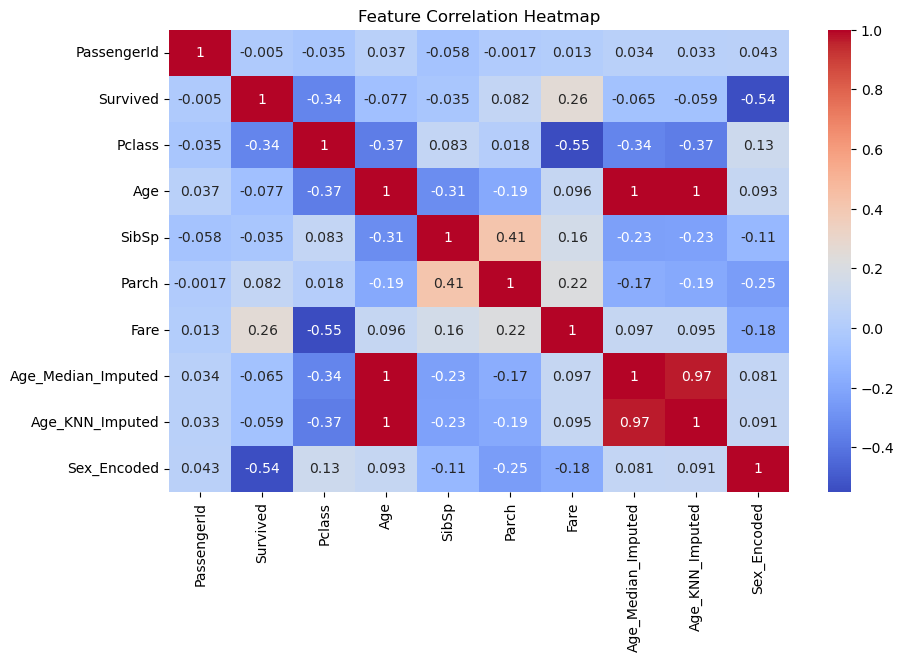

In [194]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

### Trying One hot coding to see if there is a difference in corr. as I can see there is a releation between surviaval with Fare,Parch but I am susicious about the Pclass as well.

In [225]:
df_encoded = pd.get_dummies(df, columns=['Pclass'], drop_first=False)

In [224]:
df_encoded = pd.get_dummies(df_encoded, columns=['Sex'], prefix='Sex_OneHot', drop_first=False)

In [226]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   Name                891 non-null    object 
 3   Age                 714 non-null    float64
 4   SibSp               891 non-null    int64  
 5   Parch               891 non-null    int64  
 6   Ticket              891 non-null    object 
 7   Fare                891 non-null    float64
 8   Embarked            889 non-null    object 
 9   Age_Median_Imputed  891 non-null    float64
 10  Age_KNN_Imputed     891 non-null    float64
 11  Embarked_Imputed    891 non-null    object 
 12  Sex_Encoded         891 non-null    int64  
 13  Pclass_1            891 non-null    uint8  
 14  Pclass_2            891 non-null    uint8  
 15  Pclass_3            891 non-null    uint8  
 16  Sex_OneH

/var/folders/lb/gv5g4r_n6wz726t0wv527yhw0000gn/T/ipykernel_47517/1176986811.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_encoded.corr(),annot=True,cmap='coolwarm')


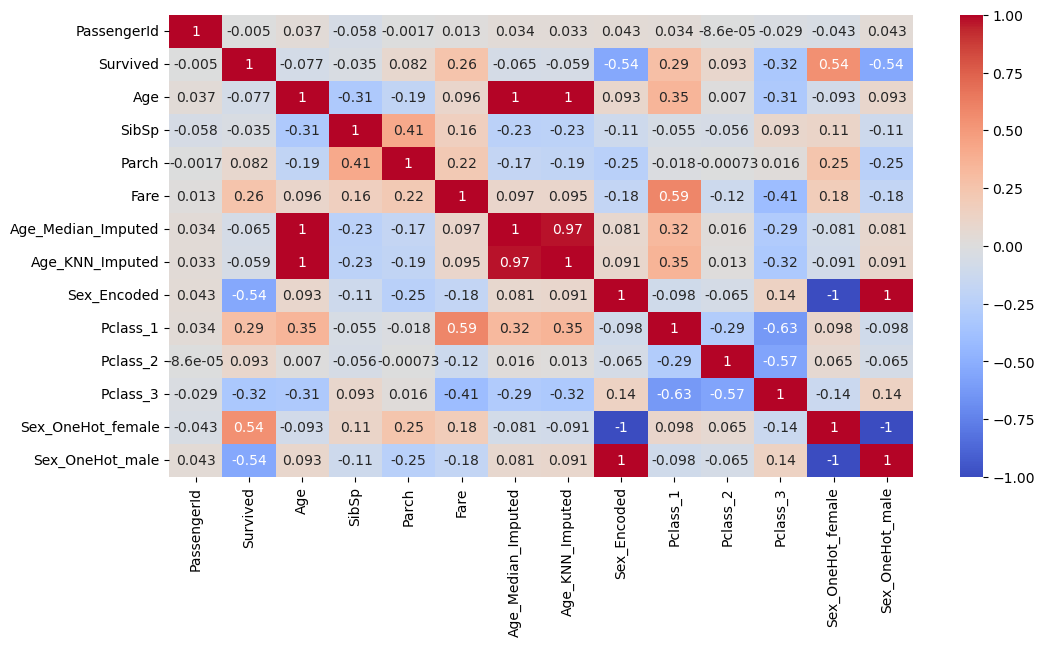

In [234]:
plt.figure(figsize=(12,6))
sns.heatmap(df_encoded.corr(),annot=True,cmap='coolwarm')

plt.show()

as seen Pclass1 is also having a +ve survival rate.

### Age and Fare Category

In [288]:
bins = [0, 12, 18, 40, 60, 100]  # Age intervals
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df_encoded['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
print(df_encoded[['Age', 'Age_Category']].head())


    Age Age_Category
0  22.0  Young Adult
1  38.0  Young Adult
2  26.0  Young Adult
3  35.0  Young Adult
4  35.0  Young Adult


In [291]:
print(df_encoded.groupby('Age_Category')['Survived'].mean())
#Check the Survival Rate by Age Category

Age_Category
Child          0.573529
Teenager       0.488889
Young Adult    0.383562
Adult          0.394161
Senior         0.269231
Name: Survived, dtype: float64


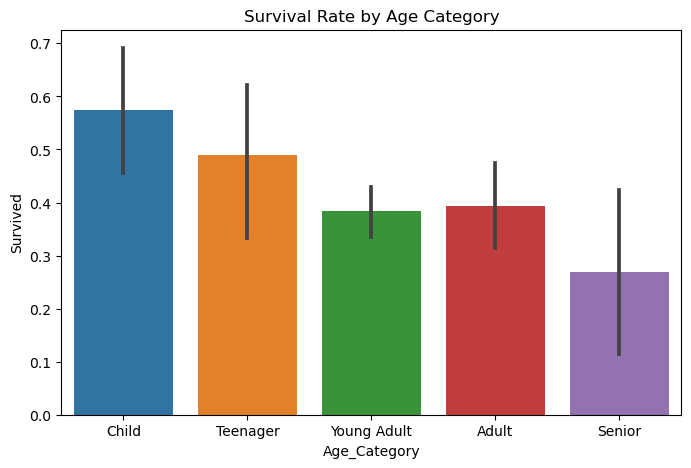

In [293]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Age_Category', y='Survived', data=df_encoded)
plt.title("Survival Rate by Age Category")
plt.show()


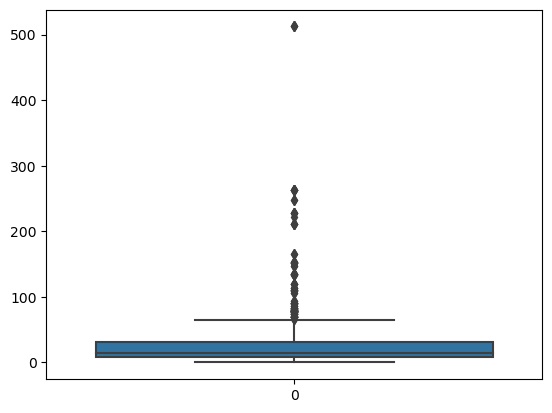

In [295]:
sns.boxplot(df['Fare'])
plt.show()

In [ ]:
bins = [0, 180, 300, 500, 600]
labels = ['0-180', '180-300', '300-500', '>500']
df_encoded['Fare'] = pd.cut(df_encoded['Fare'], bins=bins, labels=labels, right=False)

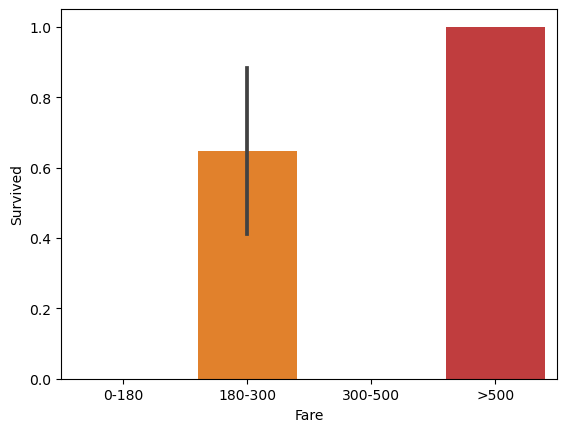

In [306]:
sns.barplot(x='Fare', y='Survived', data=df_encoded, order=labels)
plt.show()

In [307]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         891 non-null    int64   
 1   Survived            891 non-null    int64   
 2   Name                891 non-null    object  
 3   Age                 714 non-null    float64 
 4   SibSp               891 non-null    int64   
 5   Parch               891 non-null    int64   
 6   Ticket              891 non-null    object  
 7   Fare                891 non-null    category
 8   Embarked            889 non-null    object  
 9   Age_Median_Imputed  891 non-null    float64 
 10  Age_KNN_Imputed     891 non-null    float64 
 11  Embarked_Imputed    891 non-null    object  
 12  Sex_Encoded         891 non-null    int64   
 13  Pclass_1            891 non-null    uint8   
 14  Pclass_2            891 non-null    uint8   
 15  Pclass_3            891 non-null    uint

In [ ]:
# Define bins and labels
bins = [0, 180, 300, 500, 600]
labels = ['0-180', '180-300', '300-500', '>500']

# Ensure labels are properly categorized
df_encoded['Fare'] = pd.cut(df_encoded['Fare'], bins=bins, labels=labels, right=False)

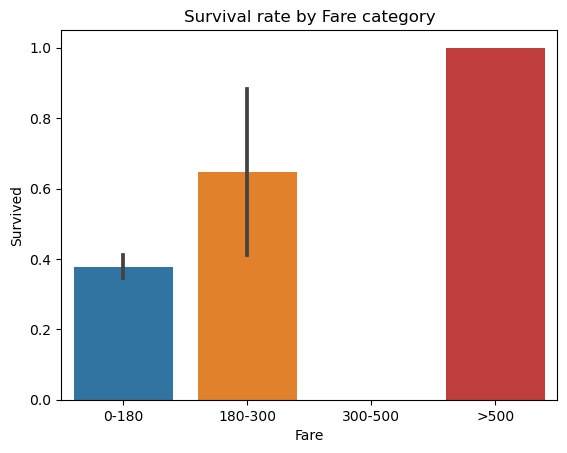

In [313]:
# Convert to string explicitly
df_encoded['Fare'] = df_encoded['Fare'].astype(str)

# Plot the barplot
sns.barplot(x='Fare', y='Survived', data=df_encoded, order=labels)

# Show the plot
plt.title('Survival rate by Fare category')
plt.show()

In [317]:
df[df['Fare'] > 500]

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Median_Imputed,Age_KNN_Imputed,Embarked_Imputed,Sex_Encoded,Pclass,Pclass_Sex
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,C,0,1,1_female
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,36.0,36.0,C,1,1,1_male
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,C,1,1,1_male


# Building a Predictive Model

### Step 1: Prepare the Data

1. Select Features & Target Variable
- Features: Pclass, Sex, Age, SibSp, Parch, Fare, Embarked
- Target: Survived

2. Handle Missing Values
- Age: You’ve already imputed it using KNN.
- Embarked: Fill missing values with the mode.

3. Convert Categorical Variables to Numerical
- Encode Sex, Embarked using One-Hot Encoding.
- Split Data into Training & Test Set

4. Use train_test_split() from sklearn.model_selection.

### Step 2: Train the Model

Logistic Regression first

### Step 3: Try Other Models (Optional)

Random Forest, Decision Tree

### Step 4: Feature Importance (For Tree-Based Models)

If you're using RandomForestClassifier, check feature importance:

In [324]:
df_encoded = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df_encoded.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Age_Median_Imputed,Age_KNN_Imputed,Embarked_Imputed,Sex_Encoded,Pclass,Pclass_Sex,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,22.0,22.0,S,1,3,3_male,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,38.0,38.0,C,0,1,1_female,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,26.0,26.0,S,0,3,3_female,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,35.0,35.0,S,0,1,1_female,0,1
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,35.0,35.0,S,1,3,3_male,0,1


In [338]:
df_encoded.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Age_Median_Imputed', 'Age_KNN_Imputed', 'Embarked_Imputed',
       'Sex_Encoded', 'Pclass_Sex', 'Embarked_Q', 'Embarked_S', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object')

In [334]:
df_encoded = pd.get_dummies(df_encoded, columns=['Pclass','Sex'],drop_first=False)

In [345]:
#selecting relevant features

features = ['Parch','Fare','Age_KNN_Imputed','Pclass_1', 'Pclass_2', 'Pclass_3','Sex_female', 'Sex_male','Embarked_Q', 'Embarked_S']
x = df_encoded[features] #independent variables
y = df_encoded['Survived'] #Target variable


# Splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

#Scaling the numerical data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)  # Fit on training data and transform
x_test = scaler.transform(x_test)        # Only transform test data (avoid data leakage)

# Logistic Regression Model
model = LogisticRegression()
model.fit(x_train,y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7877094972067039
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.77      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



In [362]:
#selecting relevant features

features = ['Parch','Fare','Age_KNN_Imputed','Pclass_1', 'Pclass_2', 'Pclass_3','Sex_female', 'Sex_male','Embarked_Q', 'Embarked_S']
x = df_encoded[features] #independent variables
y = df_encoded['Survived'] #Target variable


# Create polynomial features (degree=1)
poly = PolynomialFeatures(degree=1, include_bias=False)
x_poly = poly.fit_transform(x)


# Splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
x_poly_scaled = scaler.fit_transform(x_poly)

# Logistic Regression Model
model = LogisticRegression(solver='newton-cg',max_iter=500)
model.fit(x_train,y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



accuracy has increased from 78 to 79% with polynomial feature

In [364]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [366]:
!pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/28/3c/ddf5d9eb742cdb7fbcd5c854bce07471bad01194ac37de91db64fbef0c58/xgboost-2.1.3-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 3.6 MB/s eta 0:00:00a 0:00:01


In [367]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7821229050279329
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179

